Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [2]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(data=boston['target'], columns=['price'])
print(X.head(), y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33      price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


In [10]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_s = pd.DataFrame(s.fit_transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(s.fit_transform(X_test), columns=X_test.columns)
print(X_train_s.shape, X_test_s.shape)

(404, 13) (102, 13)


In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_c = tsne.fit_transform(X_train_s)
X_train_c.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(404, 2)

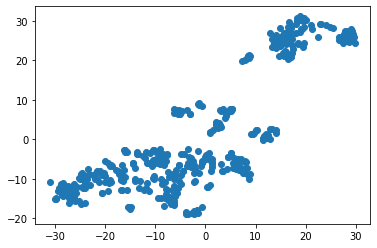

In [16]:
plt.scatter(X_train_c[:,0], X_train_c[:,1])
plt.show()



---

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_c = tsne.fit_transform(X_train_s)
X_train_c.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(404, 2)

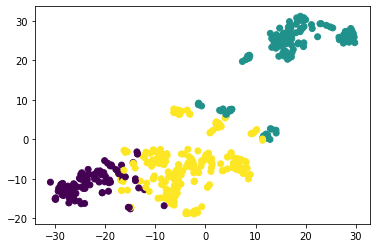

In [27]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = model.fit_predict(X_train_s)

plt.scatter(X_train_c[:,0], X_train_c[:,1] , c=labels_train)
plt.show()

In [28]:
for i in [0, 1, 2]:
  print(y_train[labels_train == i].mean())

price    27.788372
dtype: float64
price    16.165354
dtype: float64
price    24.958115
dtype: float64


In [35]:
for i in range(3):
  print(X_train.loc[labels_train == i, 'CRIM'].mean())

0.07356558139534884
10.797028425196851
0.4216602094240837




---

*Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


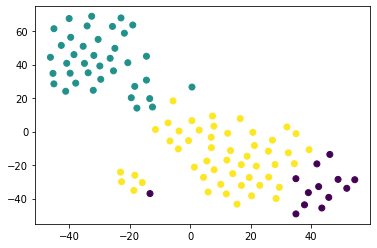

In [36]:
labels_test = model.fit_predict(X_test_s)
tsne_test_for_fun = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_c = tsne_test_for_fun.fit_transform(X_test_s)
plt.scatter(X_test_c[:,0], X_test_c[:,1] , c=labels_test)
plt.show()

In [38]:
for i in range(3):
  print(X_test.loc[labels_test == i, 'CRIM'].mean())
  print(y_test[labels_test == i].mean())

0.0830846153846154
price    34.553846
dtype: float64
9.419181842105264
price    16.710526
dtype: float64
0.22250117647058823
price    21.717647
dtype: float64
